In [1]:
!pip install burst_detection

In [2]:
# import libraries
import pandas as pd
import burst_detection as bd
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data1 = pd.read_csv('covid_tweets_01.csv')
data2 = pd.read_csv('covid_tweets_02.csv')
data3 = pd.read_csv('covid_tweets_03.csv')
data4 = pd.read_csv('covid_tweets_04.csv')
data5 = pd.read_csv('covid_tweets_05.csv')
data6 = pd.read_csv('covid_tweets_06.csv')
data7 = pd.read_csv('covid_tweets_07.csv')
data8 = pd.read_csv('covid_tweets_08.csv')
data9 = pd.read_csv('covid_tweets_09.csv')
data10 = pd.read_csv('covid_tweets_10.csv')
data11 = pd.read_csv('covid_tweets_11.csv')
data12 = pd.read_csv('covid_tweets_12.csv')
data13 = pd.read_csv('covid_tweets_13.csv')
data14 = pd.read_csv('covid_tweets_14.csv')
data15 = pd.read_csv('covid_tweets_15.csv')
data16 = pd.read_csv('covid_tweets_16.csv')
data17 = pd.read_csv('covid_tweets_17.csv')
data18 = pd.read_csv('covid_tweets_18.csv')
data19 = pd.read_csv('covid_tweets_19.csv')
data20 = pd.read_csv('covid_tweets_20.csv')
data21 = pd.read_csv('covid_tweets_21.csv')
data22 = pd.read_csv('covid_tweets_22.csv')
data23 = pd.read_csv('covid_tweets_23.csv')
data24 = pd.read_csv('covid_tweets_24.csv')
data25 = pd.read_csv('covid_tweets_25.csv')
data26 = pd.read_csv('covid_tweets_26.csv')
data27 = pd.read_csv('covid_tweets_27.csv')
data28 = pd.read_csv('covid_tweets_28.csv')
data29 = pd.read_csv('covid_tweets_29.csv')
data30 = pd.read_csv('covid_tweets_30.csv')
data31 = pd.read_csv('covid_tweets_31.csv')

frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15,
          data16, data17, data18, data19, data20, data21, data22, data23, data24, data25, data26, data27, data28, data29,
          data30, data31]

df = pd.concat(frames)

In [4]:
# numbers of observations in the dataset
df.shape

(245468, 13)

In [5]:
# display the dataset
df

user_name         user_location  \
0                              BubbyTCat               Ontario   
1                              Brett Lee                   NaN   
2                              Geoff Pan           Madison, WI   
3                        Shalom aleichem            Phoenix,AZ   
4                               Rhianwyn       Pimlico/ London   
...                                  ...                   ...   
5504                               демон                   NaN   
5505                  Gifted Te Ngaengae               Naenae.   
5506                             Charley  North Carolina Proud   
5507  Institute for a Progressive Nevada           Nevada, USA   
5508         Mobile Vaccination Services                   NaN   

                                       user_description         user_created  \
0     Speak out, silence can be deadly, especially 4...  2010-04-24 22:44:30   
1     Critical thinker.  God Fearing Happy Husband. ...  2009-02-26 00:21:01   
2     Hungry & Thirsty | Ex-scientist | Non-profit D...  2008-10-31 13:33:10   
3     I am the daughter to the most amazing mother b...  2021-12-16 04:56:26   
4     See the red arrow? Top of my head! 1992 vintag...  2017-02-15 19:14:29   
...                                                 ...                  ...   
5504  It is difficult to free fools from the chains ...  2019-11-10 03:50:10   
5505  Tangata Tiriti. She/her. My views are my own. ...  2011-08-28 04:27:18   
5506  #Resistance.  Life Long Democrat, Intelligent,...  2012-12-03 19:42:46   
5507  Institute for a Progressive Nevada educates an...  2018-10-23 19:03:08   
5508  Vax Van is a mobile service providing rapid te...  2020-12-02 00:25:50   

      user_followers  user_friends  user_favourites  user_verified  \
0                115            89            14336          False   
1                  4            97              175          False   
2                701          1202            21790          False   
3                  2            34                4          False   
4                674           706            27388          False   
...              ...           ...              ...            ...   
5504              79           152             7165          False   
5505             438          1013             8495          False   
5506            1210          1181            76710          False   
5507             256            83              401          False   
5508             156             3            24207          False   

                     date                                               text  \
0     2022-01-01 23:59:58  3rd of the way through. A recap of #covid hist...   
1     2022-01-01 23:59:04  @Florida51491495 Sad, we have a problem gettin...   
2     2022-01-01 23:58:45  What’s wilder than all the TDs in this #RoseBo...   
3     2022-01-01 23:58:20  As a healthcare worker I hear people saying ho...   
4     2022-01-01 23:57:02  Are You Listening, Yet?\n\n"Omicron is 'Less S...   
...                   ...                                                ...   
5504  2022-01-31 00:01:02  Meanwhile in #Mexico\n #COVID19 #Ivermectin #C...   
5505  2022-01-31 00:00:37  Many many people at Days Bay’s Pavillion yeste...   
5506  2022-01-31 00:00:28  #GOP Wishing away #Covid doesn't work.\nGet #V...   
5507  2022-01-31 00:00:06  As #COVID hospitalizations among predominantly...   
5508  2022-01-31 00:00:00  Home Care for COVID-19\n\n#usa \n#northcarolin...   

                                               hashtags               source  \
0                                             ['covid']      Twitter Web App   
1                                             ['covid']      Twitter Web App   
2                                 ['RoseBowl', 'COVID']   Twitter for iPhone   
3                                                   NaN   Twitter for iPhone   
4                                                   NaN  Twitter for Androi

In [6]:
# drop unnecessary columns
df = df.drop(columns = ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 
                    'user_favourites', 'user_verified', 'hashtags', 'source', 'is_retweet'])


In [7]:
# Removing punctuations

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
# tweets to lowercase, remove text in square brackets, remove url, remove punctuation and words containing numbers using regular expressions
tweets = df["text"]
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+', '', text)                         # URL links removal 
    text = re.sub(r"www\.[a-z]?\?.?(com) + [a-z]+\.(com)", '', text)   # URL links removal with regular expression like 'expression.com'
    text = re.sub(r'{link}', '', text)                                 # removal of replaced link by the this word (link)
    text = re.sub(r"\[video]", '', text)                               # removal of replaced link by video  
    text = re.sub(r'&[a-z]+;', '', text)                               # HTML reference character removal (punctuation)
    text = re.sub(r"[^a-z\s\(\-:\)\\\/\];='#']", '', text)             # non letter characters
    text = re.sub(r'@', '', text)                                      # remove mention
    return text
clean_tweets = tweets.apply(clean_text)
clean_tweets.head(10)

0    rd of the way through a recap of #covid histor...
1    florida sad we have a problem getting citizens...
2    whats wilder than all the tds in this #rosebow...
3    as a healthcare worker i hear people saying ho...
4    are you listening yet\n\nomicron is 'less seve...
5    if you believe in #vaccinemandates for an expe...
6    just found out my friend's husband is in the i...
7    name and shame -\n\nrana ayyub ranaayyub cheat...
8    -year-old possibly died in community first #ch...
9    excellent article on #covid et al\nits irratio...
Name: text, dtype: object

In [9]:
# Tokenization

def tokenize(text):
  text = re.split('\W+', text)
  return text

tweets_token = clean_tweets.apply(lambda x: tokenize(x.lower()))
tweets_token.head()

# https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

0    [rd, of, the, way, through, a, recap, of, covi...
1    [florida, sad, we, have, a, problem, getting, ...
2    [whats, wilder, than, all, the, tds, in, this,...
3    [as, a, healthcare, worker, i, hear, people, s...
4    [are, you, listening, yet, omicron, is, less, ...
Name: text, dtype: object

In [10]:
# Stopword Removal
nltk.download('stopwords')

stopword = stopwords.words('english')
more_stopwords = ["u", "im", "c", "amp", "quot", "r", "I", "team", "county", "omicron", "Omicron", "covid", "Covid", "covid19", "Covid19",
                  "The", "day", "today", "go", "k", "Us", "us", ""]
stop_words = stopword + more_stopwords

def stopwords_removal(text):
  text = [word for word in text if word not in stop_words]
  return text

tweets_nostop = tweets_token.apply(lambda x: stopwords_removal(x))
tweets_nostop.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [rd, way, recap, history, great, nice, watch, ...
1    [florida, sad, problem, getting, citizens, vot...
2    [whats, wilder, tds, rosebowl, game, maskless,...
3    [healthcare, worker, hear, people, saying, goo...
4    [listening, yet, less, severe, causes, less, l...
Name: text, dtype: object

In [11]:
# Add cleaned tweets to the main dataframe
df["final_tweets"] = tweets_nostop
df.head()

date                                               text  \
0  2022-01-01 23:59:58  3rd of the way through. A recap of #covid hist...   
1  2022-01-01 23:59:04  @Florida51491495 Sad, we have a problem gettin...   
2  2022-01-01 23:58:45  What’s wilder than all the TDs in this #RoseBo...   
3  2022-01-01 23:58:20  As a healthcare worker I hear people saying ho...   
4  2022-01-01 23:57:02  Are You Listening, Yet?\n\n"Omicron is 'Less S...   

                                        final_tweets  
0  [rd, way, recap, history, great, nice, watch, ...  
1  [florida, sad, problem, getting, citizens, vot...  
2  [whats, wilder, tds, rosebowl, game, maskless,...  
3  [healthcare, worker, hear, people, saying, goo...  
4  [listening, yet, less, severe, causes, less, l...

In [12]:
# select the most important columns and display the final dataset
final_df = df[['date', 'final_tweets']]
final_df.head()

date                                       final_tweets
0  2022-01-01 23:59:58  [rd, way, recap, history, great, nice, watch, ...
1  2022-01-01 23:59:04  [florida, sad, problem, getting, citizens, vot...
2  2022-01-01 23:58:45  [whats, wilder, tds, rosebowl, game, maskless,...
3  2022-01-01 23:58:20  [healthcare, worker, hear, people, saying, goo...
4  2022-01-01 23:57:02  [listening, yet, less, severe, causes, less, l...

In [13]:
# convert the date column into month, day and time

from datetime import datetime

final_df['Dates'] = pd.to_datetime(final_df['date']).dt.date
final_df['Time'] = pd.to_datetime(final_df['date']).dt.time

In [14]:
final_df.head()

date                                       final_tweets  \
0  2022-01-01 23:59:58  [rd, way, recap, history, great, nice, watch, ...   
1  2022-01-01 23:59:04  [florida, sad, problem, getting, citizens, vot...   
2  2022-01-01 23:58:45  [whats, wilder, tds, rosebowl, game, maskless,...   
3  2022-01-01 23:58:20  [healthcare, worker, hear, people, saying, goo...   
4  2022-01-01 23:57:02  [listening, yet, less, severe, causes, less, l...   

        Dates      Time  
0  2022-01-01  23:59:58  
1  2022-01-01  23:59:04  
2  2022-01-01  23:58:45  
3  2022-01-01  23:58:20  
4  2022-01-01  23:57:02

In [15]:
final_df['Year'] = final_df['Dates'].apply(lambda x: x.year)
final_df['month'] = final_df['Dates'].apply(lambda x: x.month)
final_df['day'] = final_df['Dates'].apply(lambda x: x.day)

In [16]:
final_df

date                                       final_tweets  \
0     2022-01-01 23:59:58  [rd, way, recap, history, great, nice, watch, ...   
1     2022-01-01 23:59:04  [florida, sad, problem, getting, citizens, vot...   
2     2022-01-01 23:58:45  [whats, wilder, tds, rosebowl, game, maskless,...   
3     2022-01-01 23:58:20  [healthcare, worker, hear, people, saying, goo...   
4     2022-01-01 23:57:02  [listening, yet, less, severe, causes, less, l...   
...                   ...                                                ...   
5504  2022-01-31 00:01:02  [meanwhile, mexico, ivermectin, coronaupdate, ...   
5505  2022-01-31 00:00:37  [many, many, people, days, bays, pavillion, ye...   
5506  2022-01-31 00:00:28  [gop, wishing, away, work, get, vaxed, wear, m...   
5507  2022-01-31 00:00:06  [hospitalizations, among, predominantly, unvac...   
5508  2022-01-31 00:00:00  [home, care, usa, northcarolina, covidvaccine,...   

           Dates      Time  Year  month  day  
0     2022-01-01  23:59:58  2022      1    1  
1     2022-01-01  23:59:04  2022      1    1  
2     2022-01-01  23:58:45  2022      1    1  
3     2022-01-01  23:58:20  2022      1    1  
4     2022-01-01  23:57:02  2022      1    1  
...          ...       ...   ...    ...  ...  
5504  2022-01-31  00:01:02  2022      1   31  
5505  2022-01-31  00:00:37  2022      1   31  
5506  2022-01-31  00:00:28  2022      1   31  
5507  2022-01-31  00:00:06  2022      1   31  
5508  2022-01-31  00:00:00  2022      1   31  

[245468 rows x 7 columns]

In [17]:
#remove words that appear fewer than X times

word_counts = Counter(final_df['final_tweets'].apply(pd.Series).stack())

unique_words = list(word_counts)

In [18]:
unique_words[:5]

['rd', 'way', 'recap', 'history', 'great']

In [19]:
flat_list = []
for sublist in tweets_nostop:
  for item in sublist:
    flat_list.append(item)
flat_list[:5]

['rd', 'way', 'recap', 'history', 'great']

In [20]:
# create a word counts dataframe and plot the most common words

words_counts = Counter(flat_list).most_common(50)
words_df = pd.DataFrame(words_counts)
words_df.columns = ["words","frq"]
display(words_df.head(10))

px.bar(words_df, x = "words", y = "frq", title = "Most common words")

# https://www.kaggle.com/chenxidong/sentiment-analysis-and-word-cloud

words    frq
0     analytics  31851
1        health  29511
2         cases  29025
3        people  21148
4          data  20147
5           new  19324
6       vaccine  17162
7           get  16802
8  publichealth  16662
9      insights  16069

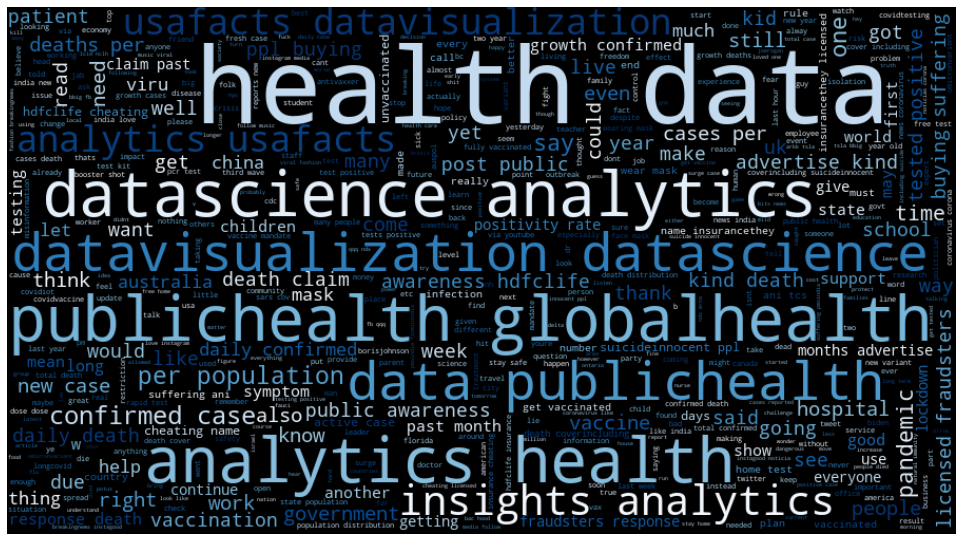

In [21]:
# Word Cloud of top words in final tweets
from wordcloud import WordCloud
text = " ".join(flat_list)
WC = WordCloud(width = 900,
               height = 500,
               stopwords = set(stop_words),
               max_words = 500,
               max_font_size = 100,
               relative_scaling = 0.5,
               colormap = "Blues",
               random_state=1).generate(text)

fig = plt.figure(1, figsize=(17,14))
plt.axis('off')
fig.subplots_adjust(top=2.3)
plt.imshow(WC, interpolation = "bilinear")
plt.show()

In [22]:
# define our plot_most_common_words function
import seaborn as sns

blog_blue = '#3498DB'
blue_cmap = sns.light_palette(blog_blue, as_cmap = True)

def most_common_words(word_counts, n, title, gradient, label_type):
  word_counts = pd.DataFrame(word_counts.most_common()[:n], columns=['word','count'])

  if gradient:
    bar_colors = blue_cmap((word_counts['count'])/(word_counts['count'].max()))
  else:
    bar_colors = blog_blue

  #create a horizontal bar plot
  plt.barh(range(n,0,-1), word_counts['count'], height=0.85, color=bar_colors, alpha=1)

  #format plot
  sns.despine(left=True,bottom=True)
  plt.ylim(0,n+1)
  plt.title(title)
  plt.grid(axis='x')

  #label bars
  if label_type == 'counts':
    plt.yticks(range(n,0,-1), word_counts['word']);
    for i, row in word_counts.iterrows():
        plt.text(row['count']-100,50-i-0.2, row['count'], horizontalalignment='right', fontsize='12', color='white')

  elif label_type == 'labeled_bars_left':
      plt.yticks(range(n,0,-1), []);
      for i, row in word_counts.iterrows():
          plt.text(50,n-i-0.2, row['word'], horizontalalignment='left', fontsize='14')

  elif label_type == 'labeled_bars_right':
      plt.yticks(range(n,0,-1), []);
      for i, row in word_counts.iterrows():
          plt.text(row['count'],n-i-0.2,row['word'], horizontalalignment='right', fontsize='14')

  else:
      plt.yticks(range(n,0,-1), words_counts['word']);


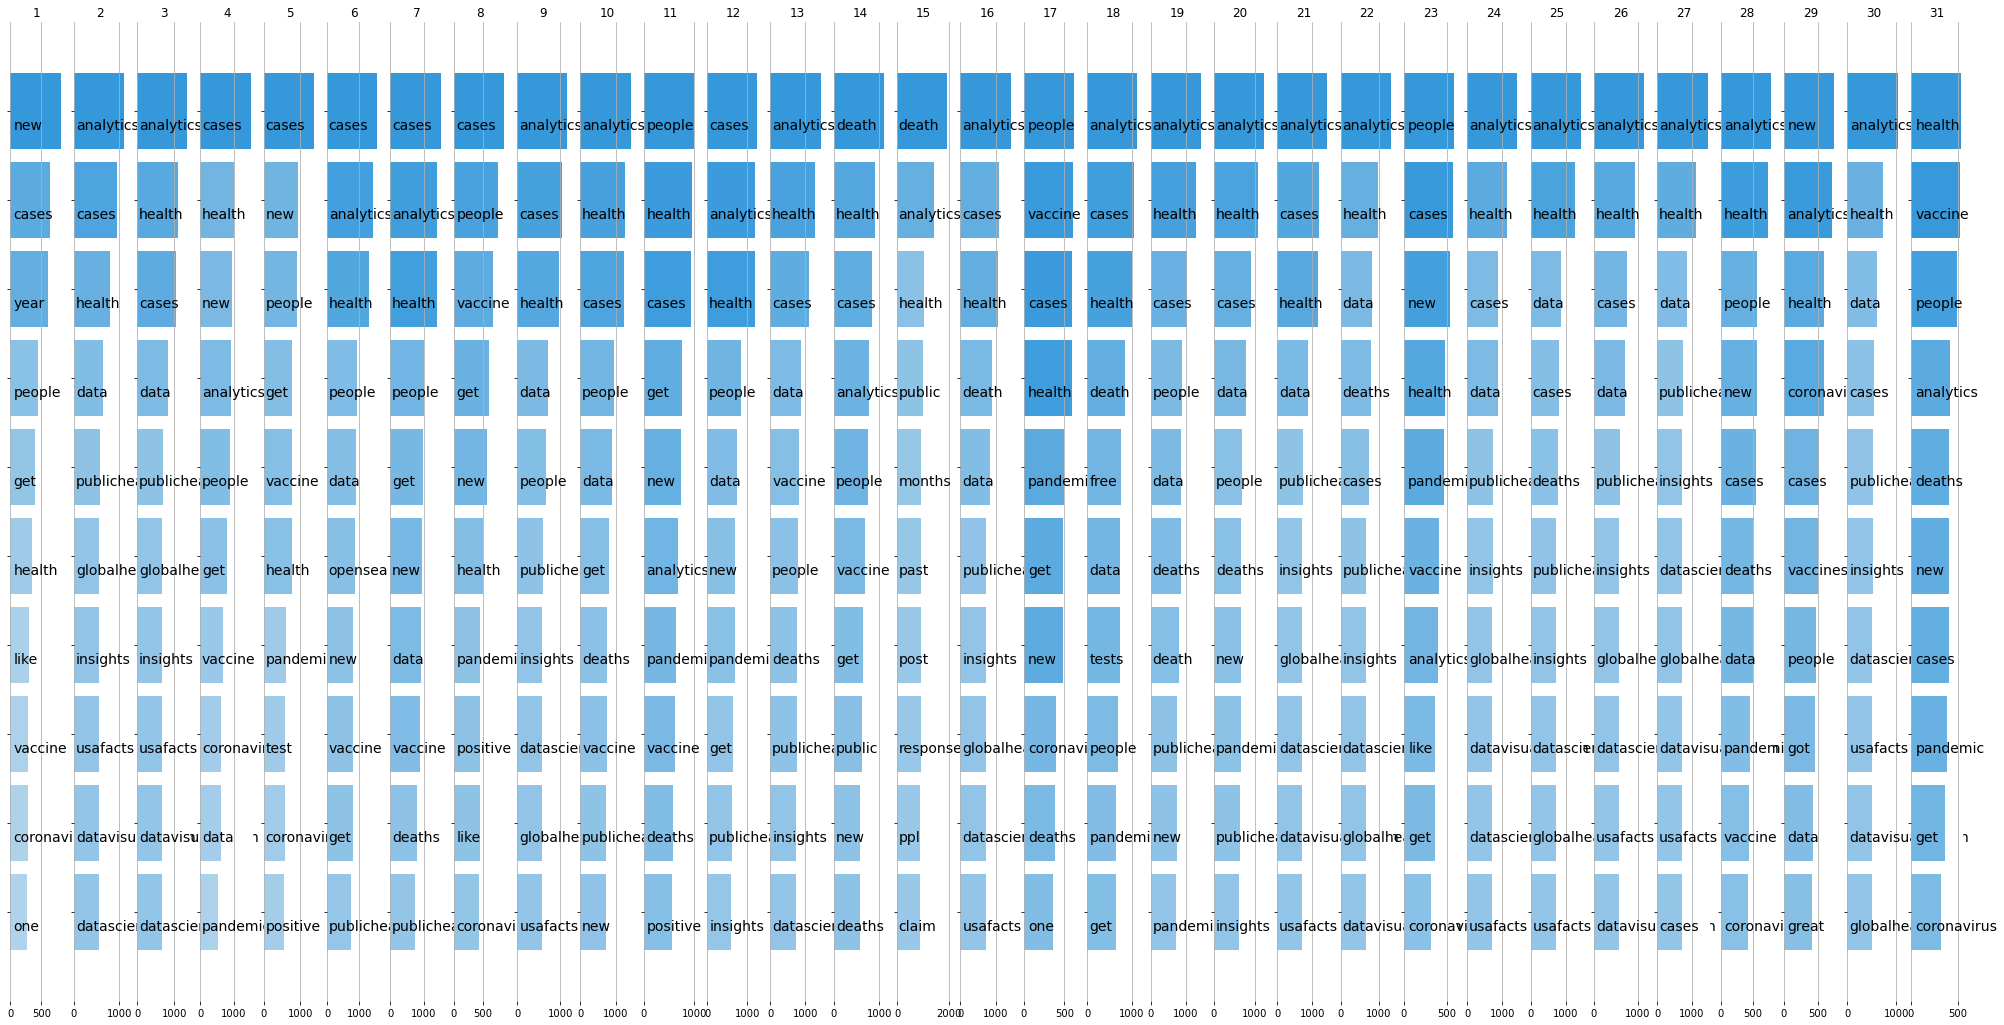

In [23]:
n = 10
start_day = 1

# subplots

fig, axes = plt.subplots(1, 31, figsize = (35,18), sharex = True, sharey = True);

for i, ax in enumerate(axes.flatten()):
  
  plt.subplot(1,31, i+1)

  # count words for the day
  day_word_count = Counter(final_df.loc[final_df['day']==start_day+i, 'final_tweets'].apply(pd.Series).stack())

  # plot n most common words
  most_common_words(word_counts = day_word_count, n = n, title = (start_day + i), gradient = True, label_type = 'labeled_bars_left')


In [24]:
# visualize timecourses of the most common words

start_day = 1  #time frame start
end_day = 31    #time frame end

#count all word occurances in the given time frame
word_counts_in_range = Counter(final_df.loc[(final_df['day']>=start_day)&(final_df['day']<=end_day),'final_tweets'].apply(pd.Series).stack())



In [ ]:
# create a custom color palette
palette20 = ['#21618C', '#3498DB', '#AED6F1', '#00838F', '#00BFA5',
             '#F1C40F', '#F9E79F', '#E67E22', '#922B21', '#C0392B', 
             '#E6B0AA', '#6A1B9A', '#8E44AD', '#D7BDE2', '#196F3D', 
             '#4CAF50', '#A9DFBF', '#4527A0', '#7986CB', '#555555']
#sns.palplot(palette20)

In [ ]:
# create a word count dataframe for the top N most common words
n = 10
most_common_word = pd.DataFrame(columns = pd.DataFrame(word_counts_in_range.most_common()[:n])[0], index = range(start_day, end_day+1))

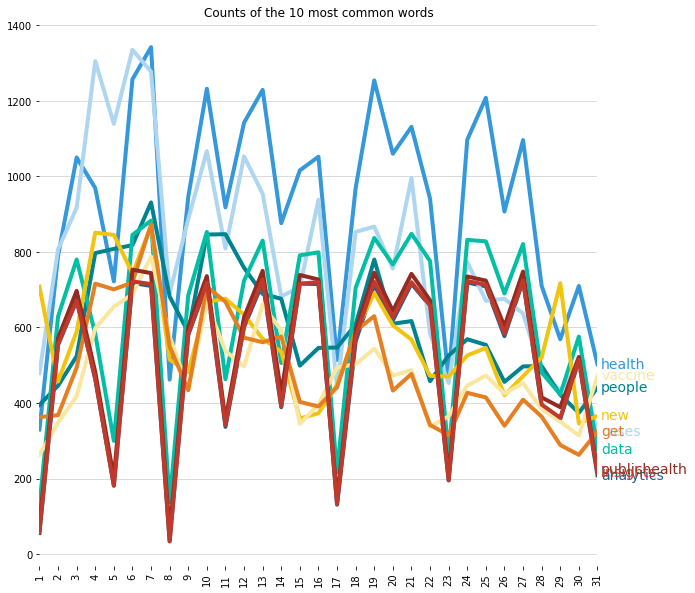

In [ ]:
for word in most_common_word.columns:
  most_common_word[word] = pd.concat([final_df['day'], final_df['final_tweets'].apply(lambda x: word in x)], axis=1) \
                                      .groupby(by=['day']) \
                                      .sum()
#initialize plot
plt.figure(figsize=(10,10))

#loop through most common words
for i, word in enumerate(most_common_word.columns):
    
    #plot line
    plt.plot(range(start_day,end_day+1), 
             most_common_word[word], 
             lw=4, color=palette20[i])

    #position for the label
    y_pos = most_common_word.loc[end_day,word]
    
    #plot time series label in the same color
    plt.text(end_day+0.2, y_pos-10, word, fontsize=14, color=palette20[i])
    
#format plot
sns.despine(left=True, bottom=True)
plt.title('Counts of the 10 most common words')
plt.grid(axis='y', color='lightgray')
plt.xticks(range(start_day,end_day+1), range(start_day,end_day+1), rotation='vertical');
plt.xlim(start_day,end_day);



In [ ]:
#find r and d for each unique word (to make it easier to use later on)
#r: number of titles that contain WORD per month
#d: total number of titles per month

#find d
#d = final_df.groupby(['month','day'])['final_tweets'].count().reset_index(drop=True)

#before finding r, tag the titles that contain the WORD
#(this method ensures r <= d (as opposed to counting the total WORD occurances per month))
#present_words = final_df['final_tweets'].apply(lambda x: pd.Series(word in x for word in unique_words))

#add column names and publication year and month (for grouping)
#present_words.columns = unique_words
#present_words['month'] = final_df['month']
#present_words['day'] = final_df['day']

#count the number of titles that contain the WORD for each time period
#all_r = present_words.groupby(['month','day']).sum()

In [ ]:
import numpy as np

#count the number of articles published each day
d = final_df.groupby(['month','day'])['final_tweets'].count().reset_index(drop=True)

#create a dataframe to contain all target word propotions
all_r = pd.DataFrame(columns=unique_words, index=d.index)

#usually it's better (faster) to create a document x unique_word dataframe
#that indicates if the word is in the document all in one step, and then
#use groupby to sum the counts for each time period. However, I kept getting
#a dead kernel and I think the issue was that there wasn't enough memory to 
#store the document x word dataframe.
for i, word in enumerate(unique_words):
    
    all_r[word] = pd.concat([final_df.loc[:,['month','day']], 
                             final_df['final_tweets'].apply(lambda x: word in x)], 
                            axis=1) \
                    .groupby(by=['month','day']) \
                    .sum() \
                    .reset_index(drop=True)
                
    #print out a status indicator
    if np.mod(i,100)==0:
        print('word',i,'complete')
    
all_r

NameError: ignored

In [ ]:
d.head()

NameError: ignored

In [ ]:
all_r.head()

rd  way  recap  history  ...  stitched  merwin  germophobe  washes
0  23  100      3       27  ...         0       0           0       0
1  30   96      1       19  ...         0       0           0       0
2  53  115      2       21  ...         0       0           0       0
3  36  174      1       35  ...         0       0           0       0
4  68  171      1       20  ...         0       0           0       0

[5 rows x 155357 columns]

In [ ]:
import numpy as np
# find bursts for each unique words

#create a dataframe to hold results
all_bursts = pd.DataFrame(columns = ['begin','end','weight'])

#define variables
s = 2         #resolution of state jumps; higher s --> fewer but stronger bursts
gam = 1     #difficulty of moving up a state; larger gamma --> harder to move up states, less bursty

n = len(d)    #number of timepoints

#loop through our flat list of unique words
for i, word in enumerate(unique_words):
    r = all_r.loc[:,word].astype(float)

  #find the optimal state sequence (using the Viterbi algorithm)
    [q,d,r,p] = bd.burst_detection(r, d, n, s, gam, smooth_win = 3)
  
  #enumerate the bursts
    bursts = bd.enumerate_bursts(q, word)

  #find weight of each burst
    bursts = bd.burst_weights(bursts, r, d, p)

  #add the bursts to a list of all bursts
    all_bursts = all_bursts.append(bursts, ignore_index = True)
    
    
  #print a progress report every 100 words
    if np.mod(i,100) == 0:
        print('word',i,'complete')

all_bursts.sort_values(by='weight', ascending=False)

word 0 complete
word 100 complete
word 200 complete
word 300 complete
word 400 complete
word 500 complete
word 600 complete
word 700 complete
word 800 complete
word 900 complete
word 1000 complete
word 1100 complete
word 1200 complete
word 1300 complete
word 1400 complete
word 1500 complete
word 1600 complete
word 1700 complete
word 1800 complete
word 1900 complete
word 2000 complete
word 2100 complete
word 2200 complete
word 2300 complete
word 2400 complete
word 2500 complete
word 2600 complete
word 2700 complete
word 2800 complete
word 2900 complete
word 3000 complete
word 3100 complete
word 3200 complete
word 3300 complete
word 3400 complete
word 3500 complete
word 3600 complete
word 3700 complete
word 3800 complete
word 3900 complete
word 4000 complete
word 4100 complete
word 4200 complete
word 4300 complete
word 4400 complete
word 4500 complete
word 4600 complete
word 4700 complete
word 4800 complete
word 4900 complete
word 5000 complete
word 5100 complete
word 5200 complete
word 

begin end   weight            label
1858    13  18  855.919       fraudsters
1710    13  18   851.77         cheating
1983    13  18  851.508         hdfclife
1074    13  18  838.078        awareness
1214    13  18  831.245        advertise
...    ...  ..      ...              ...
1730     5   5  2.96576        bidenlies
1331     2   2  2.96397         mediated
224     15  15  2.95737            unity
990     19  19  2.95496  celliottability
567      2   2  2.94677              ban

[2082 rows x 4 columns]

Text(0.5, 1.0, 'Timeline of the top 50 "bursting" topics in the Twitter data stream')

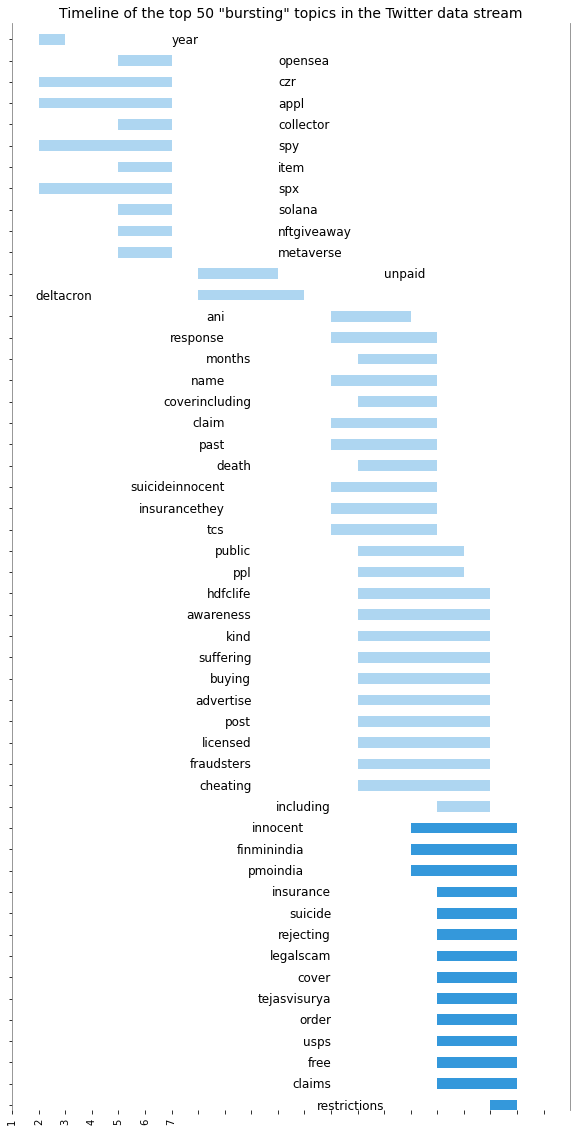

In [ ]:
#visualize the bursts

#plot only the n biggest bursts
n_bursts = 50
top_bursts = all_bursts.sort_values(by='weight', ascending=False).reset_index(drop=True).loc[:n_bursts,:]

#sort bursts by end date
sorted_bursts = top_bursts.sort_values('end', ascending=False).reset_index(drop=True)
#for bursts that end at the last timepoint, sort by start point
last_timepoint = np.max(sorted_bursts['end'])
sorted_bursts.loc[sorted_bursts['end']==last_timepoint,:] = sorted_bursts.loc[sorted_bursts['end']==last_timepoint,:] \
                                                                         .sort_values(by='begin', ascending=False) \
                                                                         .reset_index(drop=True)
    
#format bars
bar_width = 0.5                                 #width of bars
bar_pos = np.array(range(len(sorted_bursts)))   #positions of top edge of bars
ylabel_pos = bar_pos + (bar_width/2)            #y axis label positions
n = len(d)                                      #number of time points

#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 20))

#plot current bursts in blue and old bursts in plate blue
sorted_bursts['color'] = '#AED6F1' #blue
sorted_bursts.loc[sorted_bursts['end']==last_timepoint,'color'] = blog_blue

#plot the end points
end_bars = ax.barh(bar_pos, sorted_bursts.loc[:,'end'], bar_width, align='edge', 
        color=sorted_bursts['color'], edgecolor='none')

#plot the start points (in white to blend in with the background)
start_bars = ax.barh(bar_pos, sorted_bursts.loc[:,'begin'], bar_width, align='edge', 
        color='w', edgecolor='none')

#label each burst
plt.yticks(ylabel_pos, '') #remove default labels
for burst in range(len(sorted_bursts)):
    width = int(end_bars[burst].get_width())
    #place label on right side for early bursts
    if width <= (n/2):
        plt.text(width+4, ylabel_pos[burst], sorted_bursts.loc[burst,'label'],
                fontsize=12, va='center')
    #place label on left side for late bursts
    else:
        width = int(start_bars[burst].get_width())
        plt.text(width-4, ylabel_pos[burst], sorted_bursts.loc[burst,'label'],
                fontsize=12, va='center', ha='right')
        
#format plot
ax.set(xlim=(0, n), ylim=(0,n_bursts+1), ylabel='', xlabel='')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_color([0.5, 0.5, 0.5])    
ax.spines["right"].set_color([0.5, 0.5, 0.5])

plt.xticks(range(0, n), range(1, 8), rotation='vertical')

ax.set_title('Timeline of the top ' + str(n_bursts) +' "bursting" topics in the Twitter data stream', size=14)
#plt.tight_layout()
#plt.savefig("bursts_top100_g0-5_s2.png", bbox_inches="tight", dpi=300)

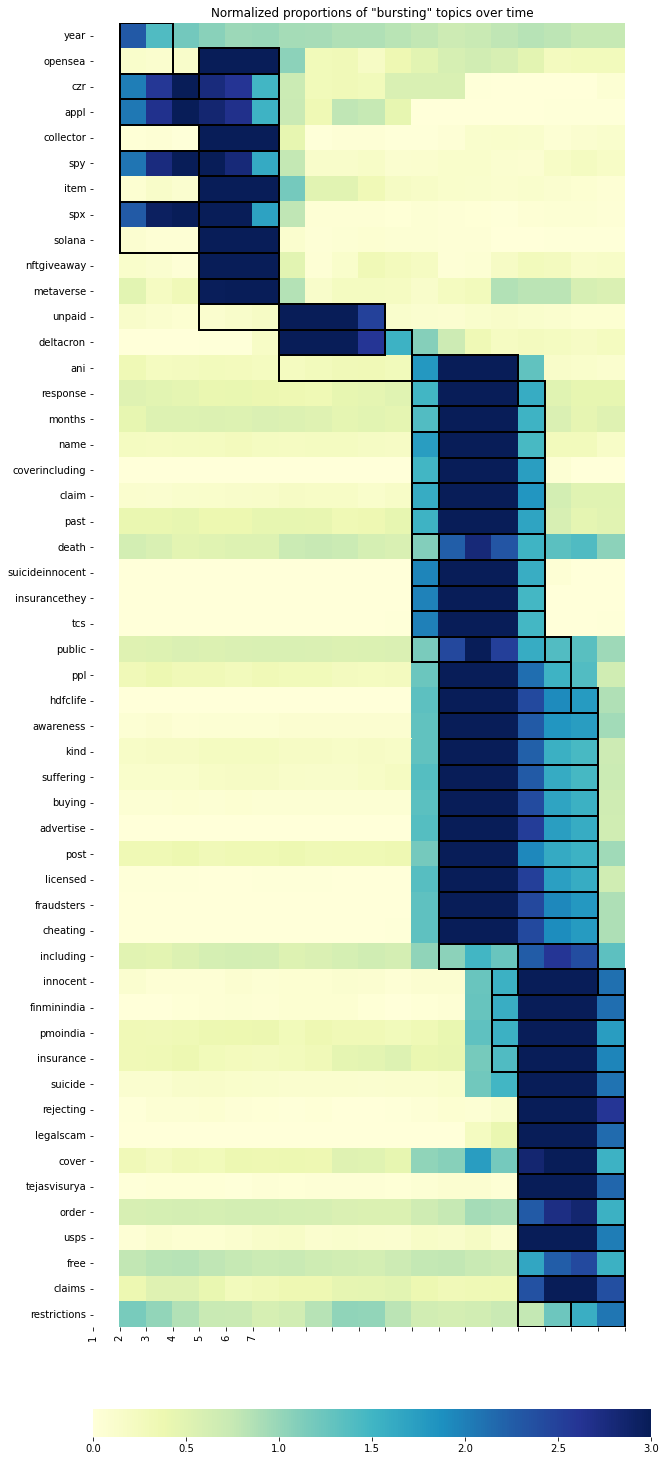

In [ ]:
#create a heatmap of p vs. time for the bursting words

#pull out the r values that will be displayed
heatmap_tweets = all_r.loc[:,set(sorted_bursts['label'])]

#find the baseline proportions sum(r)/sum(d) for each label
baseline_p = heatmap_tweets.sum(axis=0) / d.sum()

#convert r values into proportions at each timepoint
heatmap_tweets = heatmap_tweets.apply(lambda x: x/d)

#sort the rows according to the order used in the timeline
order = sorted_bursts['label'].drop_duplicates(keep='last').values
#transpose data and reindex the data according to the sorted word order
heatmap_tweets = heatmap_tweets.T.reindex(order)

#optional: demean proportions
#heatmap_data = heatmap_data - heatmap_data.mean(axis=1)

#optional: convert proportions into multiples of the baseline proportion
heatmap_tweets = heatmap_tweets.apply(lambda x: x/baseline_p[x.index])

#smooth proportions with the same smoothing window used in burst detection
smoothed_heatmap_tweets = heatmap_tweets.rolling(window=3, center=True, axis=1).mean()

#create the heatmap
plt.figure(figsize=(10,30))
ax = sns.heatmap(smoothed_heatmap_tweets[::-1], vmin=0, vmax=3, cmap="YlGnBu", yticklabels=True, annot=False, fmt=".2g",
                 cbar_kws = dict(use_gridspec=False, location="bottom", pad=0.05, shrink=1))
plt.title('Normalized proportions of "bursting" topics over time')
plt.xticks(range(0, n), range(1, 8), rotation='vertical')

#create boxes around bursting periods
for index, burst in sorted_bursts.iterrows():
        
    #define outline positions
    y = smoothed_heatmap_tweets.index.get_loc(burst['label'])
    y = len(smoothed_heatmap_tweets) - y - 1  #reverse since it counts from bottom
    xstart = burst['begin'] 
    width = burst['end'] - burst['begin'] + 1
    
    #draw rectangle
    ax.add_patch(plt.Rectangle((xstart,y), width, height=2, alpha=1, fill = True,
                           facecolor='none', edgecolor='k', linewidth=2))


In [ ]:
from datetime import datetime
import scipy.stats as stats
#find words with upward trends

#create a dataframe to hold the slopes of the word counts
word_trends = pd.DataFrame(columns=['m','baseline_prop'], index=unique_words)

#last n months
period_start = pd.Timestamp('2022-01-01')

#denote which months to include in the analysis
days_index = final_df.groupby(by=['Dates']).count().reset_index()['Dates']
days = days_index >= period_start

#loop through words
for word in unique_words:
    
    #pull out proportion of titles with WORD throughout the whole time period
    word_trends.loc[word,'baseline_prop'] = np.sum(all_r[days][word]) / np.sum(d[days])

    #find the proporitions of titles with WORD for each month 
    prop =  all_r[days][word] / d[days]
    
    #normalize the proportions 
    norm_prop = prop / word_trends.loc[word,'baseline_prop']

    #find the slope of the proportions over time by taking the line of best fit
    word_trends.loc[word,'m'] = stats.linregress(range(sum(days)),norm_prop)[0]

word_trends.sort_values(by='m', ascending=False).head(20)

m baseline_prop
washes                      0.271223   5.48113e-06
discriminationfuck          0.271223   5.48113e-06
collectrnft                 0.271223   5.48113e-06
majoracceptable             0.271223   5.48113e-06
inequitykills               0.271223   5.48113e-06
minorincursion              0.271223   5.48113e-06
redsquirrelappreciationday  0.271223   5.48113e-06
registeredvoters            0.271223   5.48113e-06
biggerpicture               0.271223   5.48113e-06
rickrubin                   0.271223   5.48113e-06
reimer                      0.271223   5.48113e-06
sophielouisecc              0.271223   5.48113e-06
stocious                    0.271223   5.48113e-06
marybethdonnel              0.271223   5.48113e-06
sethcotlar                  0.271223   5.48113e-06
letteacherslive             0.271223   5.48113e-06
valleyhealth                0.271223   5.48113e-06
distresssays                0.271223   5.48113e-06
susanpolicy                 0.271223   5.48113e-06
ikinwid                     0.271223   5.48113e-06

In [ ]:
#visualize the time courses of the top trending words

top_n = 10      #number of words to include in the plot
win = 11        #width of smoothing window for plotting; 1 for no smoothing

#pull out the top trending words and their slopes
#only use words with a baseline proportion of at least 0.01
trending_words_p = word_trends.loc[word_trends['baseline_prop']>0.004,:]
#select top n words with steepest slopes
top_words = trending_words_p.sort_values(by='m', ascending=False).iloc[0:top_n,:]



In [ ]:
p

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8     0.014766
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
dtype: float64

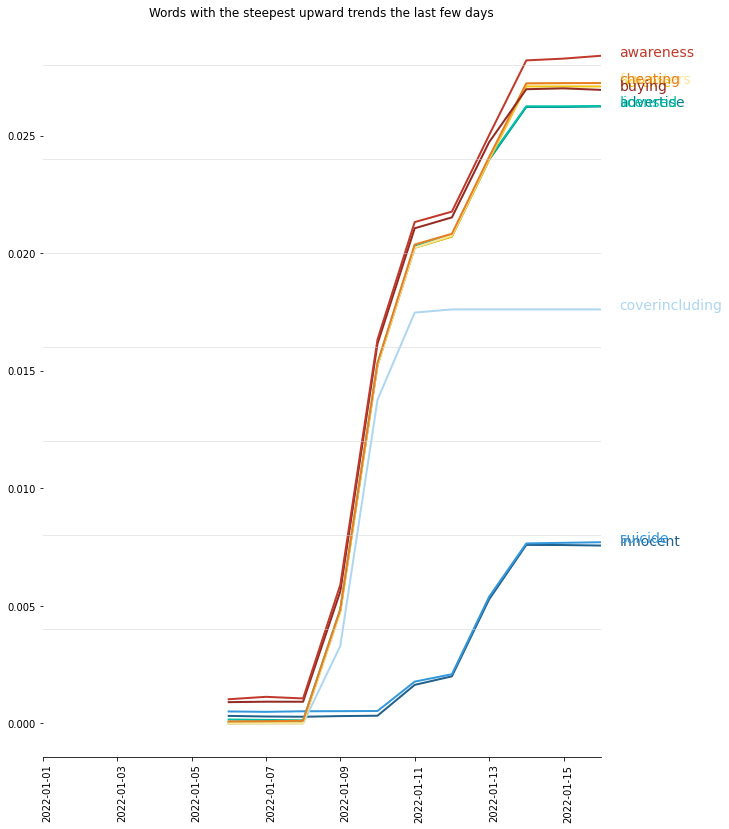

In [ ]:
#set up the plot
fig, ax = plt.subplots(figsize=(10, 15))  
  
#plot time series of trending words
for pos, word in enumerate(top_words.sort_values(by='baseline_prop').index):
    
    #calculate p
    p = all_r.loc[:,word]/d
    
    #smooth p to aid visualization
    p = p.rolling(window=win, center=True).mean()

    #plot time series
    plt.plot(days_index[days], p[days].values,lw=2, color=palette20[pos])   
    
    #define the position for the label
    y_pos = p[~np.isnan(p)][-1:] #final proportion
    x_pos = ax.get_xlim()[1]     #right of plot
 
   
    plt.text(x_pos, y_pos, word, fontsize=14, color=palette20[pos])  
    
    #add a title
plt.title('Words with the steepest upward trends the last few days')

#remove left axis
sns.despine(left=True)

#restrict the x axis to the smoothed window
ax.set_xlim(period_start,(days_index[-1:]-pd.DateOffset(days=(win-1)//2)).values)
#format the xticks
plt.gcf().autofmt_xdate(rotation='vertical', ha='left')

#convert the y axis labels to percentages
##yticks = np.arange(0.004,ax.get_ylim()[1],0.004)
##ylabels = ax.get_yticks()
##ax.set_yticklabels(['{:2.2f}%'.format(y*100) for y in ylabels])

#add horizontal gridlines
for y in np.arange(0.004,ax.get_ylim()[1],0.004):
    plt.axhline(y, color='lightgray', linestyle='-', linewidth=1, alpha=0.5)


#plt.tight_layout(rect=[0,0,0.85,1])
#plt.savefig("trending_words_since_2002.png", bbox_inches="tight", dpi=300)
